/var/folders/sv/xzgywwf17_d3f25rzb7z7jjh0000gn/T/ipykernel_45828/2048882573.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Count'].fillna(1, inplace=True)
/var/folders/sv/xzgywwf17_d3f25rzb7z7jjh0000gn/T/ipykernel_45828/2048882573.py:51: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowr

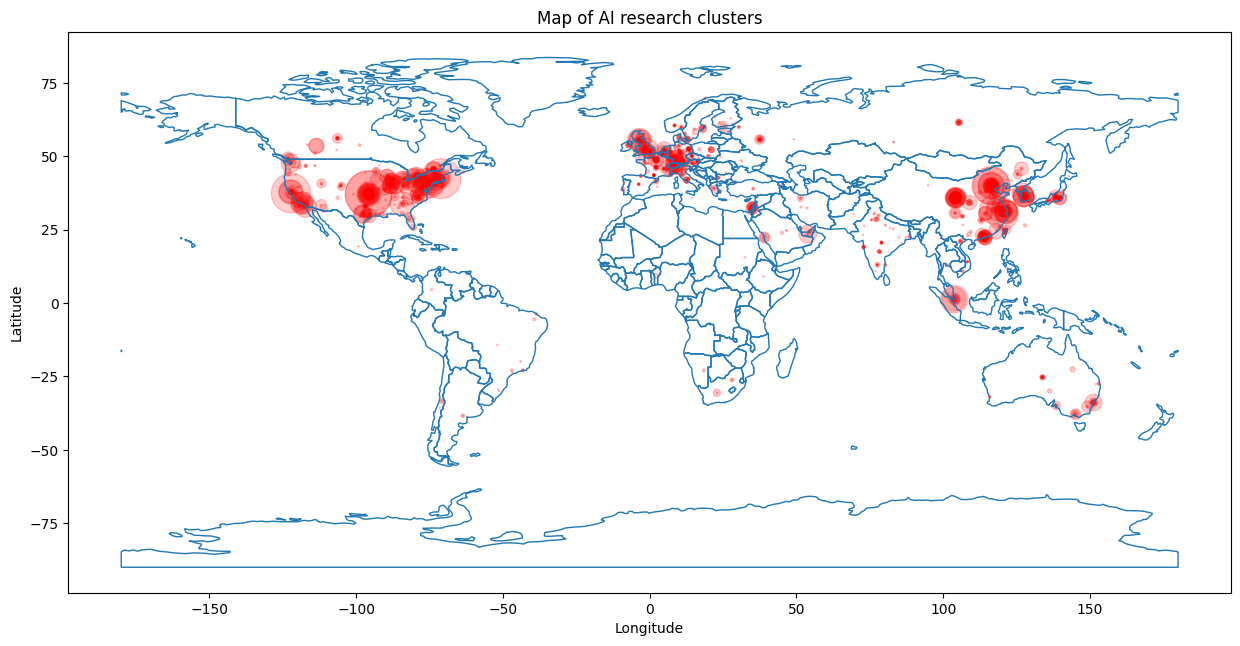

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import json
import os

# Sample data provided
file_path = "affiliations_countries_cleaned_coordinates.csv"

# Create a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing coordinates
df = df.dropna(subset=["Latitude", "Longitude"])

# Assume 'json_files' is a list of JSON file paths you want to process
json_files = os.listdir('/Users/cowolff/Documents/GitHub/ai-impact-check/data/')
json_files = [f for f in json_files if f.endswith('.json')]
json_files = ['/Users/cowolff/Documents/GitHub/ai-impact-check/data/' + f for f in json_files]

# Initialize a dictionary to count affiliation occurrences
affiliation_count = {}

# Loop through the JSON files and count the affiliations
for json_file in json_files:
    with open(json_file, 'r') as f:
        data = json.load(f)
        for paper in data:
            for author in paper['authors']:
                affiliation = author['affiliation'].strip()
                if affiliation:
                    if affiliation in affiliation_count:
                        affiliation_count[affiliation] += 1
                    else:
                        affiliation_count[affiliation] = 1

# Convert the affiliation count dictionary to a DataFrame
affiliation_df = pd.DataFrame(list(affiliation_count.items()), columns=['Affiliation', 'Count'])

# Merge the count data with the original DataFrame
df = df.merge(affiliation_df, how='left', left_on='Institution', right_on='Affiliation')

# Fill missing counts with 1 (assuming an affiliation not in the JSON files should have size 1)
df['Count'].fillna(1, inplace=True)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the map
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, color='red', markersize=gdf['Count'], alpha=0.2)  # Adjust size multiplier as needed

# Add titles and labels
plt.title('Map of AI research clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.savefig("heatmap.pdf")

In [6]:
# top 10 counts
df.sort_values('Count', ascending=False).head(20)

,Institution,Country,Latitude,Longitude,Affiliation,Count
1486,Google,United States,37.090240,-95.712891,Google,1127.0
622,Google,United States,37.090240,-95.712891,Google,1127.0
1048,Massachusetts Institute of Technology,United States,42.360091,-71.094160,Massachusetts Institute of Technology,826.0
679,Stanford University,United States,37.427660,-122.170060,Stanford University,802.0
2284,"Tsinghua University, Tsinghua University",China,39.999667,116.326444,"Tsinghua University, Tsinghua University",740.0
1075,Peking University,China,39.904211,116.407395,Peking University,720.0
978,Carnegie Mellon University,United States,40.443203,-79.942850,Carnegie Mellon University,522.0
1052,Zhejiang University,China,30.308684,120.086500,Zhejiang University,521.0
1531,University of Science and Technology of China,China,31.821994,117.280590,University of Science and Technology of China,433.0
1269,National University of Singapore,Singapore,1.296643,103.776394,National University of Singapore,395.0
